<a href="https://colab.research.google.com/github/Terrencebosco/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-05-13 00:20:13--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.234.61
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.234.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  55.2MB/s    in 3.6s    

2020-05-13 00:20:17 (54.9 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01/instacart_2017_05_01


In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
import pandas as pd

In [50]:
##### YOUR CODE HERE #####
# files in folders with csv
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


In [0]:
# read in files 
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

looking for useful columns.


In [0]:
aisles.sample(3)

,aisle_id,aisle
75,76,indian foods
87,88,spreads
113,114,cleaning products


In [0]:
departments.sample(3)

,department_id,department
16,17,household
9,10,bulk
2,3,bakery


In [0]:
order_products__prior.sample(3)


,order_id,product_id,add_to_cart_order,reordered
31609255,3333959,21278,9,0
12339895,1302609,45416,13,1
12552016,1324756,3717,3,0


In [0]:
order_products__train.sample(3)

,order_id,product_id,add_to_cart_order,reordered
41897,102724,1940,10,0
999877,2469986,36070,17,1
886383,2187184,44910,7,1


In [0]:
orders.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0


In [77]:
products.shape

(49688, 4)

In [0]:
#gaining relevent columns from respective files.
sub_prior = order_products__prior[['product_id','order_id']]

sub_product = products[['product_id', 'product_name']]

In [108]:
# merge sub files then apply condition to pull out useful info.
merge_products = pd.merge(sub_prior, sub_product, on='product_id')
# merge_products.shape
merge_products.shape

(32434489, 3)

In [54]:
# creating and applying a condition for top products. 

mylist = ['Banana', 'Bag of Organic Bananas', 'Organic Strawberries',
          'Organic Baby Spinach', 'Organic Hass Avocado', 'Organic Avocado',
          'Large Lemon', 'Strawberries', 'Limes', 'Organic Whole Milk']

condition = merge_products['product_name'].isin(mylist)
top_products = merge_products[condition]
top_products['product_name'].value_counts()

Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: product_name, dtype: int64

--------------------------------------------------------------------------------

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
# table2 -> tidy
#list of columns
table2.columns.tolist()


['John Smith', 'Jane Doe', 'Mary Johnson']

In [0]:
#list of indexs
table2.index.to_list()

['treatmenta', 'treatmentb']

In [0]:
#reset index
table2 = table2.reset_index()

In [0]:
#tidy chart
#melt table2 
tidy2 = table2.melt(id_vars='index', value_vars=['John Smith', 'Jane Doe', 'Mary Johnson'])
tidy2

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [0]:
# rename columns
tidy2 = tidy2.rename(columns={
    'index' : 'Treatment',
    'variable' : 'Names',
    'value' : 'Results'
})

# shorten 'tretment_' to _
tidy2['Treatment'] = tidy2['Treatment'].str.replace('treatment', '')
tidy2

,Treatment,Names,Results
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


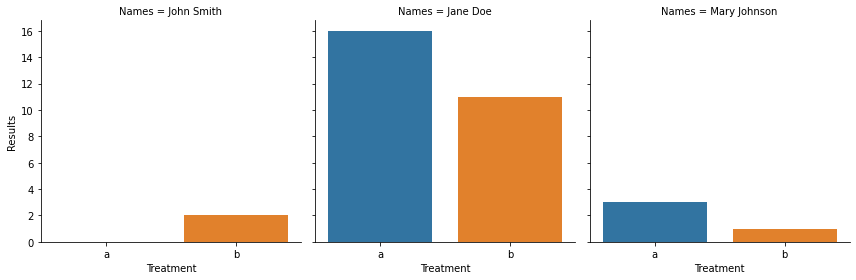

In [0]:
#chart 
sns.catplot(x='Treatment', y='Results', col='Names', 
            kind='bar', data=tidy2, height=4);

In [0]:
# tidy -> table2

wide2 = tidy2.pivot_table(values='Results', index='Treatment', columns='Names')
wide2

Names,Jane Doe,John Smith,Mary Johnson
Treatment,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


In [0]:
flights = sns.load_dataset('flights')
# Load seaborn's flights dataset by running the cell below. Then create a pivot
# table showing the number of passengers by month and year. Use year for the index 
# and month for the columns. You've done it right if you get 112 passengers for January
# 1949 and 432 passengers for December 1960.

In [0]:
# Flights Pivot Table
flights.columns.to_list()

['year', 'month', 'passengers']

In [0]:
flights.index.to_list() #just row numbers

In [0]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [0]:
flights_pivot = flights.pivot_table(values='passengers', index= 'month', columns='year')
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [99]:
##### YOUR CODE HERE #####
#what i want: top 25 itemes for after 12:00pm
#what i need: time of day, condition = # of orders >= 2900 and orders past 12pm

# added time of day, and order number
merge_products.sample(3)

#new df for order hour of day
time = orders[['order_id', 'order_hour_of_day']]

#merge
merge_time = pd.merge(merge_products, time, on='order_id')

print(merge_time.head(1))

   product_id  order_id        product_name  order_hour_of_day
0       33120         2  Organic Egg Whites                  9


In [95]:
# make condition for only orders after 12:00pm
condition3 = merge_time['order_hour_of_day'] >= 12 
time_after_12 = merge_time[condition3]
time_after_12['order_hour_of_day'].value_counts().sort_index()


12    2620847
13    2663292
14    2691548
15    2664533
16    2537458
17    2089465
18    1637923
19    1259401
20     977038
21     796370
22     634734
23     402620
Name: order_hour_of_day, dtype: int64

In [105]:
print(time_after_12.sample(1))

         product_id  order_id              product_name  order_hour_of_day
2343375       34283   2880087  Fudgsicle No Sugar Added                 15


In [92]:
time_after_12['product_name'].value_counts().head(25)

Banana                        36883
Bag of Organic Bananas        29222
Organic Strawberries          20709
Organic Baby Spinach          18746
Organic Hass Avocado          16995
Organic Avocado               14297
Large Lemon                   12110
Limes                         11311
Strawberries                  10852
Organic Raspberries           10396
Organic Whole Milk            10084
Organic Yellow Onion           8959
Organic Garlic                 8861
Organic Zucchini               8226
Cucumber Kirby                 7933
Organic Blueberries            7538
Organic Lemon                  7075
Organic Fuji Apple             6782
Organic Grape Tomatoes         6699
Apple Honeycrisp Organic       6524
Organic Cucumber               6462
Seedless Red Grapes            6227
Sparkling Water Grapefruit     6158
Honeycrisp Apple               6120
Organic Baby Arugula           6055
Name: product_name, dtype: int64

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####